In [92]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy

import numpy as np
from sklearn import preprocessing

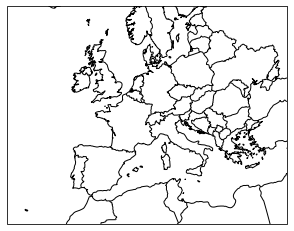

In [63]:
central_lon, central_lat = -5, 55
extent = [-20, 30, 30, 60]

plt.figure()
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.coastlines(resolution='50m')
ax.add_feature(cartopy.feature.BORDERS)

In [64]:
df_farms = pd.read_csv('EuropeanAgriculture_FarmStructureIndicators_Eurostat2016.csv')
df_farms.head()

,Country,farms_number,used_agricultural_area_ha,standard_output_EUR,subsistence_semisubsistence_farms,total_labour_persons,total_labour_AWU,nonfamily_labour_persons,nonfamily_labour_AWU,managers_basic_training,...,farms_SO_less2000,farms_SO_2000-3999,farms_SO_4000-7999,farms_SO_8000-14999,farms_SO_15000-24999,farms_SO_25000-49999,farms_SO_50000-99999,farms_SO_100000-249999,farms_SO_250000-499999,farms_SO_500000_orover
0,Belgium,36890,1354250,8.037986e+09,NaN,70910,55350,19800.0,14810.0,9940,...,310,580,1380,2410,2670,4310,5130,9010,7170,3880
1,Bulgaria,202720,4468500,3.842891e+09,0.0,439740,255520,64490.0,59100.0,5360,...,105730,35210,22440,13590,8450,6780,4040,2740,1480,1510
2,Czechia,26530,3455410,NaN,4120.0,130290,103270,81840.0,71440.0,4910,...,1150,2840,4350,4320,3050,3200,2400,2230,980,1930
3,Denmark,35050,2614600,1.006244e+10,0.0,73320,49480,25780.0,22840.0,16340,...,600,790,2480,4920,4740,5510,4260,3910,2170,5510
4,Germany,276120,16715320,4.924902e+10,0.0,653760,502610,178640.0,148330.0,133520,...,460,6790,21510,33650,29560,37200,40100,53820,32350,20430


In [65]:
df_coords = pd.read_csv('country-capitals.csv',on_bad_lines='skip')
df_coords.head()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.550000,44.050000,NaN,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667,TF,Antarctica
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe


In [66]:
df = pd.merge(
    df_farms, 
    df_coords, 
    how="left", 
    left_on="Country", 
    right_on="CountryName"
)
df = df.drop(['CountryName','ContinentName'], axis=1)
df.head()

,Country,farms_number,used_agricultural_area_ha,standard_output_EUR,subsistence_semisubsistence_farms,total_labour_persons,total_labour_AWU,nonfamily_labour_persons,nonfamily_labour_AWU,managers_basic_training,...,farms_SO_15000-24999,farms_SO_25000-49999,farms_SO_50000-99999,farms_SO_100000-249999,farms_SO_250000-499999,farms_SO_500000_orover,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode
0,Belgium,36890,1354250,8.037986e+09,NaN,70910,55350,19800.0,14810.0,9940,...,2670,4310,5130,9010,7170,3880,Brussels,50.833333,4.333333,BE
1,Bulgaria,202720,4468500,3.842891e+09,0.0,439740,255520,64490.0,59100.0,5360,...,8450,6780,4040,2740,1480,1510,Sofia,42.683333,23.316667,BG
2,Czechia,26530,3455410,NaN,4120.0,130290,103270,81840.0,71440.0,4910,...,3050,3200,2400,2230,980,1930,NaN,NaN,NaN,NaN
3,Denmark,35050,2614600,1.006244e+10,0.0,73320,49480,25780.0,22840.0,16340,...,4740,5510,4260,3910,2170,5510,Copenhagen,55.666667,12.583333,DK
4,Germany,276120,16715320,4.924902e+10,0.0,653760,502610,178640.0,148330.0,133520,...,29560,37200,40100,53820,32350,20430,Berlin,52.516667,13.400000,DE


## What this does
- Normalizes the data so it's easier for me to scale variables

In [78]:
def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        new_col_name = col+'_normalized'
        df[new_col_name] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col]) * 1000
    return df

In [79]:
min_max_scaler = preprocessing.MinMaxScaler()

df_test = scaleColumns(df, ['farms_number','used_agricultural_area_ha'])
df_test.head()

,Country,farms_number,used_agricultural_area_ha,standard_output_EUR,subsistence_semisubsistence_farms,total_labour_persons,total_labour_AWU,nonfamily_labour_persons,nonfamily_labour_AWU,managers_basic_training,...,farms_SO_50000-99999,farms_SO_100000-249999,farms_SO_250000-499999,farms_SO_500000_orover,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,farms_number_normalized,used_agricultural_area_ha_normalized
0,Belgium,36890,1354250,8.037986e+09,NaN,70910,55350,19800.0,14810.0,9940,...,5130,9010,7170,3880,Brussels,50.833333,4.333333,BE,10.210347,48.308746
1,Bulgaria,202720,4468500,3.842891e+09,0.0,439740,255520,64490.0,59100.0,5360,...,4040,2740,1480,1510,Sofia,42.683333,23.316667,BG,58.697801,160.319879
2,Czechia,26530,3455410,NaN,4120.0,130290,103270,81840.0,71440.0,4910,...,2400,2230,980,1930,NaN,NaN,NaN,NaN,7.181161,123.881777
3,Denmark,35050,2614600,1.006244e+10,0.0,73320,49480,25780.0,22840.0,16340,...,4260,3910,2170,5510,Copenhagen,55.666667,12.583333,DK,9.672345,93.640120
4,Germany,276120,16715320,4.924902e+10,0.0,653760,502610,178640.0,148330.0,133520,...,40100,53820,32350,20430,Berlin,52.516667,13.400000,DE,80.159412,600.804804


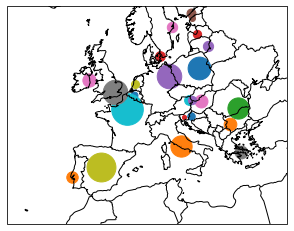

In [105]:
central_lon, central_lat = -5, 55
extent = [-20, 30, 30, 60]

plt.figure()
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))

# print(df['CapitalLongitude'], df['CapitalLatitude'])
cmap = plt.cm.rainbow

for i in df.itertuples():
    ax.scatter(
        i.CapitalLongitude, 
        i.CapitalLatitude, 
        s=i.used_agricultural_area_ha_normalized,
        # s=i.farms_number_normalized,
        # color='blue', 
        # color = cmap(i.used_agricultural_area_ha_normalized),
        # color = cmap(i.farms_number_normalized),
        # cmap=plt.get_cmap('plasma'),
        transform=ccrs.PlateCarree()
    )
    # print(i.CapitalLongitude, i.CapitalLatitude, i.CountryCode)
    # ax.text(i.CapitalLongitude, i.CapitalLatitude, i.CountryCode)

ax.set_extent(extent)
ax.coastlines(resolution='50m')
ax.add_feature(cartopy.feature.BORDERS)

plt.show()